In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

def drawing_conf_matrix(y_test, predictes_values, title):
    conf_matrix = confusion_matrix(y_test, predictes_values)

    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)

    sns.heatmap(conf_matrix, cmap='cividis' , square=True, annot=True, cbar=True,
            xticklabels=[str(i) for i in range(1, 7)],
            yticklabels=[str(i) for i in range(1, 7)])

    plt.xlabel('Prediction')
    plt.ylabel('Real value')
    plt.title(title, fontsize=20)

    plt.show()




In [3]:
path = 'C:/Users/matys/Downloads/kaggle_data/'
file_name = 'Stars.csv'

df = pd.read_csv(path + file_name, sep=",")
df[0:10]

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
5,2840,0.000650,0.1100,16.98,Red,M,0
6,2637,0.000730,0.1270,17.22,Red,M,0
7,2600,0.000400,0.0960,17.40,Red,M,0
8,2650,0.000690,0.1100,17.45,Red,M,0
9,2700,0.000180,0.1300,16.05,Red,M,0


In [4]:
any_nulls = df.isnull().values.any()
any_nulls

False

In [5]:
numerical_values = df.iloc[:, 0:4]
categorical_values = df.iloc[:, 4: len(df.columns) - 1]
types = list(df['Type'])


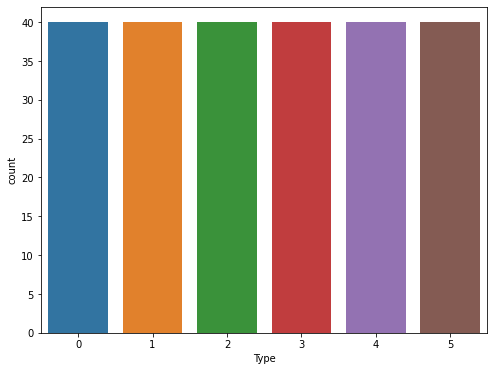

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=df, x="Type")
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

numerical_values_scaler = StandardScaler()
categorical_values_scaler = OrdinalEncoder()

transformed_numerical_values = numerical_values_scaler.fit_transform(numerical_values)
transformed_categorical_values = categorical_values_scaler.fit_transform(categorical_values)

new_x_values = np.concatenate((transformed_numerical_values, transformed_categorical_values), axis=1) 
new_x_values

array([[-0.7793821 , -0.59862356, -0.45920992,  1.11674535,  8.        ,
         5.        ],
       [-0.78210961, -0.59862357, -0.45924053,  1.16241376,  8.        ,
         5.        ],
       [-0.82847728, -0.59862357, -0.45934168,  1.36221308,  8.        ,
         5.        ],
       ...,
       [-0.17502879,  2.40315735,  2.29779992, -1.43783157,  9.        ,
         0.        ],
       [-0.13243767,  1.66287782,  1.69517694, -1.48540283,  9.        ,
         0.        ],
       [ 2.87275403,  1.04834522,  2.99536993, -1.15906395,  0.        ,
         6.        ]])

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_values_after_pca = pca.fit_transform(new_x_values)

df_after_pca = pd.DataFrame({'x1': x_values_after_pca[:, 0], 
                             'x2': x_values_after_pca[:, 1],
                             'label': types})
df_after_pca

,x1,x2,label
0,2.483737,-1.021431,0
1,2.488092,-1.017530,0
2,2.512831,-1.003466,0
3,2.492689,-1.019310,0
4,2.535340,-0.997786,0
...,...,...,...
235,-6.385435,-2.514709,5
236,-6.495543,-3.026009,5
237,2.771748,2.847062,5
238,2.837548,3.037865,5


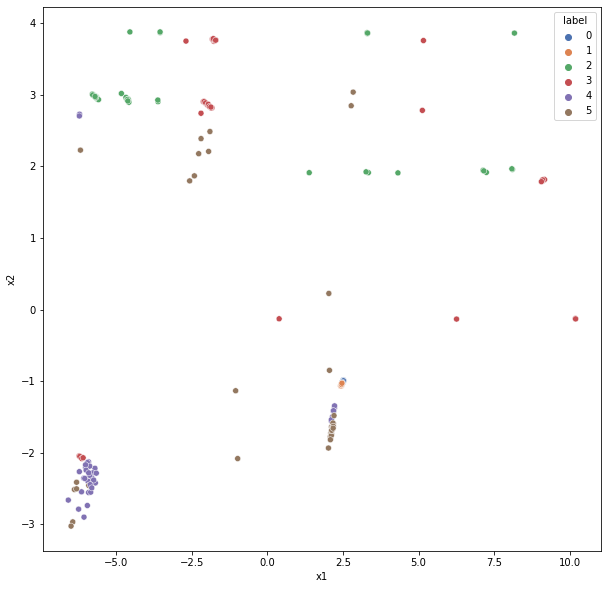

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.scatterplot(x="x1", y="x2", data=df_after_pca, hue="label", palette="deep")
plt.show()

In [10]:
x1_exp_var, x2_exp_var = pca.explained_variance_ratio_
print(f'x1 : {x1_exp_var.__round__(2)}%, x2: {x2_exp_var.__round__(2)}%\n')
explained_variance = (np.cumsum(pca.explained_variance_ratio_))[1]
print(f"Total level of explained variance: {explained_variance.__round__(2)}%")


x1 : 0.71%, x2: 0.17%

Total level of explained variance: 0.88%


First variable has the biggest impact on classifying model beacuse its level od explained variance is about 71% which is more than a half. Togheter with second varaible they explain 88% of total variance which is satysfying value and we could recoginize this model after dimension reduction as 'reliable'.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessClassifier

x_train, x_test, y_train, y_test = train_test_split(new_x_values, types, train_size=0.75)

gpc_classifier = GaussianProcessClassifier()

gpc_classifier.fit(x_train, y_train)
gpc_type_predictions = gpc_classifier.predict(x_test)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, accuracy_score

rfc_classifier = RandomForestClassifier()
rfc_classifier.fit(x_train, y_train)
rfc_type_predictions = rfc_classifier.predict(x_test)



GPC accuracy

Test accuracy: 0.9833333333333333
Test recall score: 0.9833333333333333



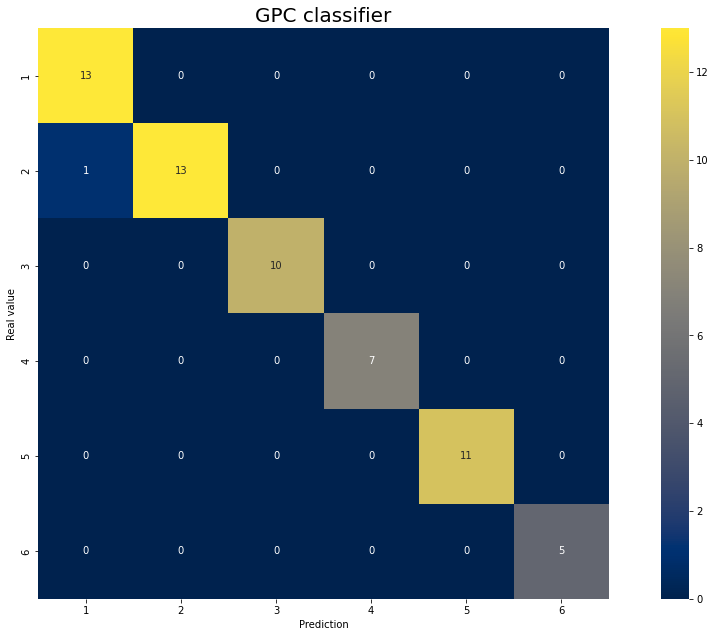

In [13]:
print("GPC accuracy\n")
print(f"Test accuracy: {accuracy_score(y_test, gpc_type_predictions)}")
print(f"Test recall score: {recall_score(y_test, gpc_type_predictions, average='micro')}\n")

drawing_conf_matrix(y_test, gpc_type_predictions, 'GPC classifier')


RFC accuracy

Test accuracy: 1.0
Test recall score: 1.0



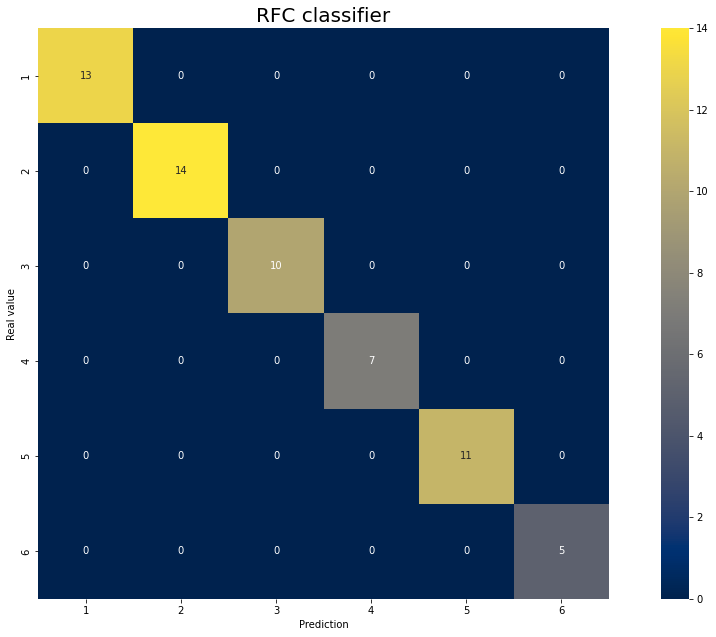

In [14]:
print("RFC accuracy\n")
print(f"Test accuracy: {accuracy_score(y_test, rfc_type_predictions)}")
print(f"Test recall score: {recall_score(y_test, rfc_type_predictions, average='micro')}\n")

drawing_conf_matrix(y_test, rfc_type_predictions, 'RFC classifier')